## **Importing Libraries**

In [1]:
# Importing all required libraries

import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

## **Loading and Displaying the dataset**

In [2]:
# Reading the dataset
data = pd.read_csv('../input/kerala.csv') 
# Displaying the dataset into tabular format
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


## **Exploratory Data Analysis**

In [3]:
# Printing row and columns

data.shape 

(118, 16)

In [4]:
# Checking for null values

data.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [5]:
# Generating descriptive statistics

data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
# Information about data

data.info

<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9

In [7]:
# Computing pairwise covariance of columns

data.cov()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [8]:
# Calculating the relationship between each column in dataset / Calculating correlation coefficients

data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [9]:
# Label encoding and replacing values in the Floods column (YES, NO) with (1, 0)

data['FLOODS'].replace(['YES','NO'],[1,0],inplace = True)

In [10]:
# Displaying the values

data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [11]:
# Features/columns from JAN to DEC
x = data.iloc[:,2:14]
# First n rows of the dataset or 5 by default
x.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [12]:
# Target or lables or column of floods

y = data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

**Data Visualization**

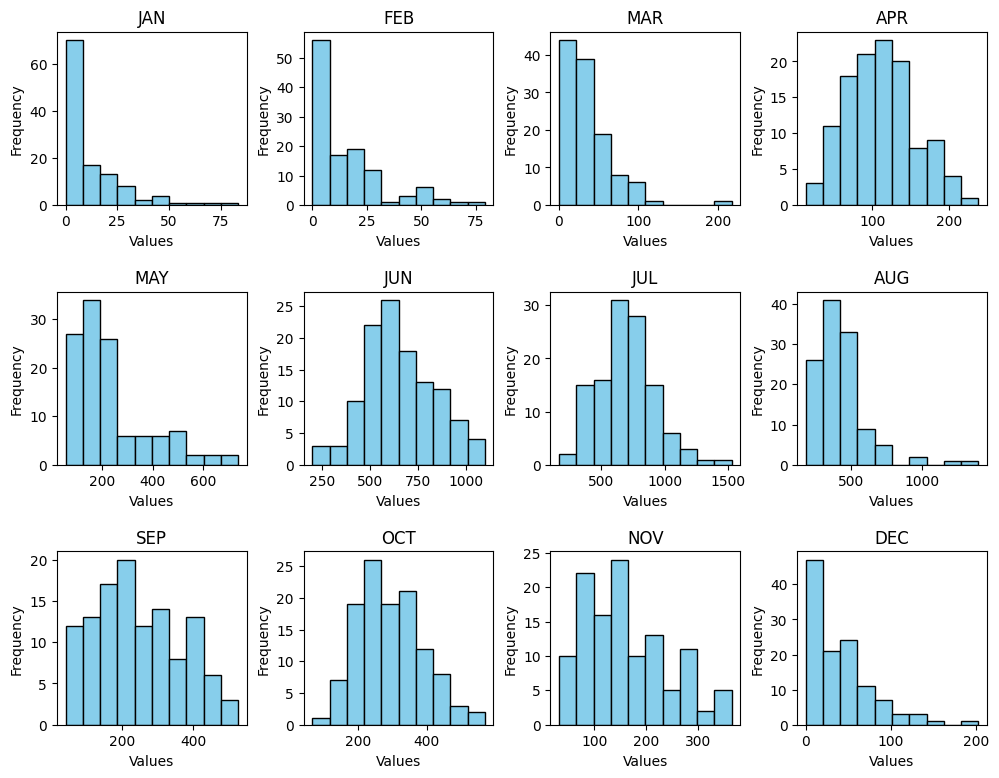

In [13]:
# Creating a 3x4 grid of subplots to plot histograms for each month's data

c = data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

# Flatten the 2D axes array to 1D for easy iteration
axes = axes.ravel()

# Plot each histogram in a separate subplot
for i, col in enumerate(c.columns):
    axes[i].hist(c[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Show the plot
plt.show()

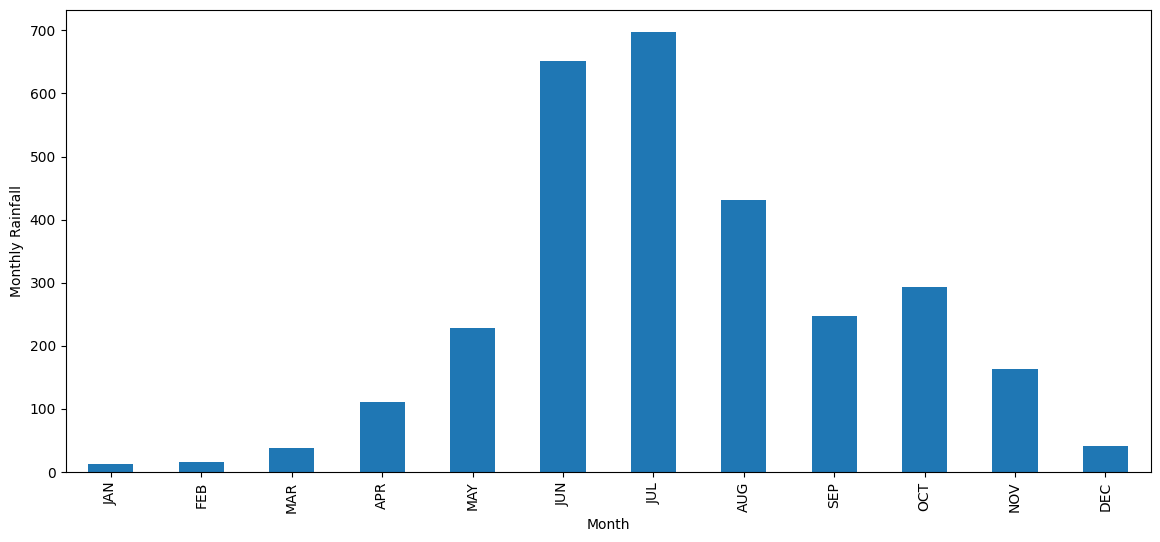

In [14]:
# Creating a bar plot of the average (mean) monthly rainfall for each month

mx = data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot.bar(figsize=(14,6))
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.show()

## **Decision Tree**

In [16]:
# Splitting the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [17]:
# Decision Tree Classification

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier()

**Prediction**

In [18]:
# Predicting on x_test

y_pred = dtc_clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

**Accuracy**

In [19]:
# Priting the accuracy of the model

acc1 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", acc1)

Accuracy: 0.7916666666666666


**Evaluation**

In [20]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using Decision Tree

pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

,Actual,Prediction
56,1,1
89,0,0
4,0,1
45,1,1
26,1,1
116,0,0
69,0,0
10,0,0
90,1,1
73,0,0


## **Random Forest**

In [21]:
# Random Forest Classification

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [45]:
x_train

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
44,4.4,9.9,12.7,104.1,53.4,549.8,704.0,351.8,110.9,253.8,259.5,18.0
12,3.1,5.2,20.7,75.7,198.8,541.7,763.2,247.2,176.9,422.5,109.9,45.8
15,0.0,7.8,22.0,82.4,199.0,920.2,513.9,396.9,339.3,320.7,134.3,8.9
70,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3
107,0.8,30.3,217.2,108.4,81.2,469.9,505.1,349.0,347.0,343.4,55.4,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.5,5.6,7.3,138.5,192.7,705.9,966.3,489.6,526.7,357.2,87.4,11.9
14,16.9,23.5,42.7,106.0,154.5,696.1,775.6,298.8,396.6,196.6,302.5,14.9
92,0.0,17.8,20.1,66.5,159.0,657.1,776.1,301.9,88.0,431.2,153.8,46.2
51,5.2,48.2,20.8,112.2,214.6,576.7,430.0,413.6,57.4,339.6,49.6,66.9


**Prediction**

In [22]:
# Predicting on x_test

y_pred2= clf.predict(x_test)
y_pred2

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

**Accuracy**

In [23]:
# Priting the accuracy of the model

acc2 = metrics.accuracy_score(y_test,y_pred2)
print("Accuracy of Random Forest:", acc2)

Accuracy of Random Forest: 0.9166666666666666


**Evaluation**

In [24]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using Random Forest

pd.DataFrame({'Actual':y_test,'Prediction':y_pred2})

,Actual,Prediction
56,1,1
89,0,0
4,0,0
45,1,1
26,1,1
116,0,0
69,0,0
10,0,0
90,1,1
73,0,1


## **Hyperparameter Tuning using RandomizedSearchCV**

In [25]:
# Defining the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [None, 20, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)

# Fitting the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Getting the best hyperparameters and best model from RandomizedSearchCV
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

**Prediction**

In [26]:
# Predicting on x_test

y_pred3= best_model_random.predict(x_test)
y_pred3

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

**Accuracy**

In [27]:
# Priting the accuracy of the model

acc3 = metrics.accuracy_score(y_test,y_pred3)
print("Accuracy of RandomizedSearchCV on Random Forest:", acc3)

Accuracy of RandomizedSearchCV on Random Forest: 0.9583333333333334


**Evaluation**

In [28]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using RandomizedSearchCV

pd.DataFrame({'Actual':y_test,'Prediction':y_pred3})

,Actual,Prediction
56,1,1
89,0,0
4,0,0
45,1,1
26,1,1
116,0,0
69,0,0
10,0,0
90,1,1
73,0,1


## **Hyperparameter Tuning using GridSearchCV**

In [29]:
# Defining the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fitting the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters and best model from GridSearchCV
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

**Prediction**

In [30]:
# Predicting on x_test

y_pred4= best_model_grid.predict(x_test)
y_pred4

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

**Accuracy**

In [31]:
# Priting the accuracy of the model

acc4 = metrics.accuracy_score(y_test,y_pred4)
print("Accuracy of GridSearchCV on Random Forest:", acc4)

Accuracy of GridSearchCV on Random Forest: 0.9583333333333334


**Evaluation**

In [32]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using GridSearchCV

pd.DataFrame({'Actual':y_test,'Prediction':y_pred4})


,Actual,Prediction
56,1,1
89,0,0
4,0,0
45,1,1
26,1,1
116,0,0
69,0,0
10,0,0
90,1,1
73,0,1


## **Displaying Accuracy in Histogram**

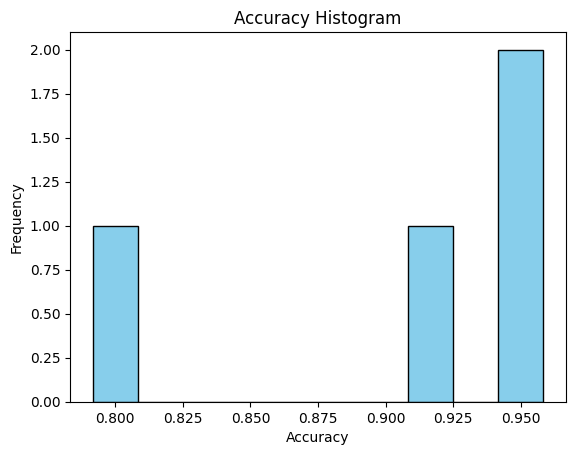

In [33]:
# Generating histogram for every accuracy of each of models

acc_scores = [acc1, acc2, acc3, acc4]

# Creating a histogram for accuracy scores
plt.hist(acc_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')
plt.show()

## **Plotting AUC-ROC Curve for Best Model**

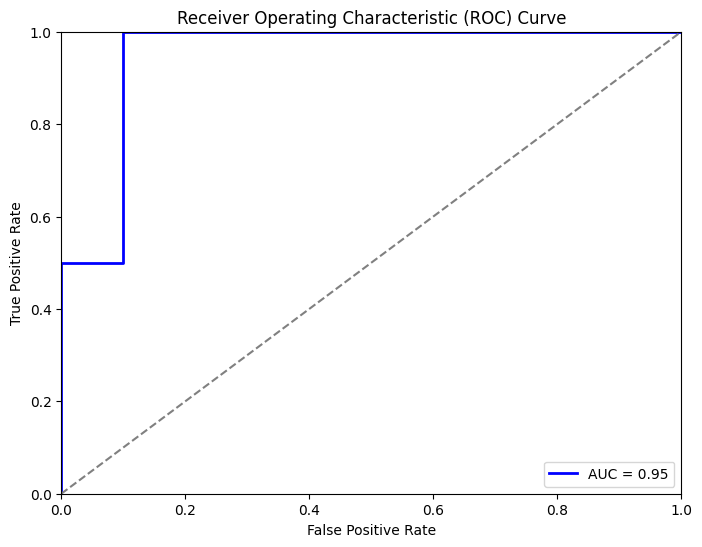

In [34]:
if len(best_model_grid.classes_) == 2:  # Binary classification
    y_probs = best_model_grid.predict_proba(x_test)[:, 1]
else:  # Multi-class classification
    y_probs = best_model_grid.predict_proba(x_test)

# Calculate the AUC-ROC score
if len(best_model_grid.classes_) == 2:  # Binary classification
    auc_roc = roc_auc_score(y_test, y_probs)
else:  # Multi-class classification
    auc_roc = roc_auc_score(y_test, y_probs, multi_class='ovr')

# Getting the false positive rate, true positive rate, and threshold values for plotting the curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **Confusion Matrix**

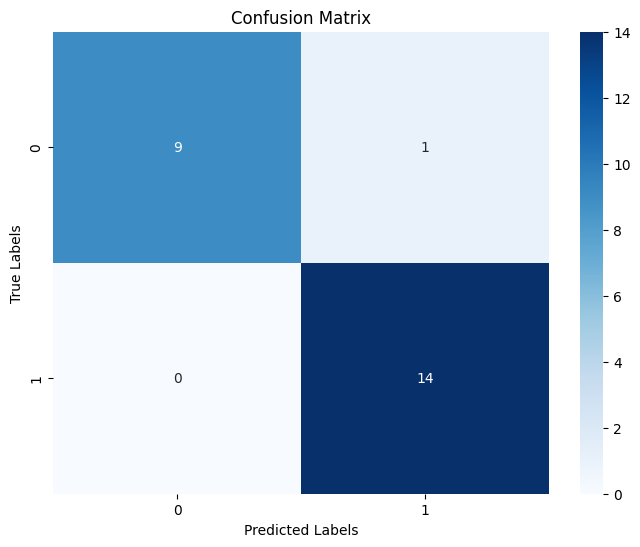

In [35]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred4)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
import joblib

# Save the trained model
joblib.dump(best_model_grid, 'flood_prediction.pkl')
joblib.dump(best_model_grid, 'flood_scaler.pkl')

['flood_scaler.pkl']

In [47]:
import joblib
import numpy as np

# Load the model with manual values
model = joblib.load('flood_prediction.pkl')

# Suppose the user provides the monthly rainfall values as a list (this is the input array)
# Example input for manual prediction (12 months of rainfall)
input_values = [2.4, 8.1, 37.9, 113.2, 610.9, 673.4, 385.4, 417.9, 192.8, 320.6, 120.7, 2.7]

# Convert the input list to a numpy array (2D array with 1 row)
input_array = np.array(input_values).reshape(1, -1)

columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']  
input_df = pd.DataFrame([input_values], columns=columns)
# Predict using the trained model
prediction = model.predict(input_df)

print(f"Prediction result: {prediction}")


Prediction result: [0]
